# Nettoyage et visualisation des données

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal

In [198]:
file_path = "C:/Users/hp/Downloads/"
data = pd.read_csv(file_path + "02-resultats-par-region.csv")

In [199]:
unique_cand_nom = data["cand_nom"].unique()
unique_reg_name = data["reg_name"].unique()
columns_to_drop = ['url', 'reg_code', 'reg_code_3', 'num_tour', 'cand_num_panneau','cand_prenom', 'cand_civil']
data = data.drop(columns_to_drop, axis=1)

In [200]:
data

,reg_name,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,blancs_pourc_inscrits,blancs_pourc_votants,nuls_nb,nuls_pourc_inscrits,nuls_pourc_votants,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_nom,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ARTHAUD,1084,0.80,0.34
1,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ROUSSEL,668,0.49,0.21
2,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,MACRON,18137,13.43,5.74
3,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LASSALLE,1033,0.76,0.33
4,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LE PEN,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,HIDALGO,1589,1.07,0.65
212,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,JADOT,4801,3.25,1.98
213,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,PÉCRESSE,9363,6.33,3.85
214,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,POUTOU,1374,0.93,0.57


In [201]:
data.dtypes

reg_name                    object
inscrits_nb                  int64
abstention_nb                int64
abstention_pourc           float64
votants_nb                   int64
blancs_nb                    int64
blancs_pourc_inscrits      float64
blancs_pourc_votants       float64
nuls_nb                      int64
nuls_pourc_inscrits        float64
nuls_pourc_votants         float64
exprimes_nb                  int64
exprimes_pourc_inscrits    float64
exprimes_pourc_votants     float64
cand_nom                    object
cand_nb_voix                 int64
cand_rapport_exprim        float64
cand_rapport_inscrits      float64
dtype: object

In [202]:
data.describe()

,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,blancs_pourc_inscrits,blancs_pourc_votants,nuls_nb,nuls_pourc_inscrits,nuls_pourc_votants,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
count,2.160000e+02,2.160000e+02,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000,216.000000,2.160000e+02,216.000000,216.000000
mean,2.602713e+06,6.434746e+05,33.611111,1.959238e+06,29831.333333,1.121111,1.770556,12930.555556,0.660000,1.158889,1.916476e+06,64.607778,97.070556,1.597064e+05,8.333472,5.384120
std,2.066640e+06,4.654940e+05,14.951546,1.607773e+06,23069.918116,0.155957,0.435437,8684.780929,0.289442,0.826009,1.576591e+06,15.088400,1.203991,2.764383e+05,10.939477,6.867687
min,9.218700e+04,5.502400e+04,21.210000,3.716300e+04,825.000000,0.800000,1.330000,553.000000,0.360000,0.470000,3.505000e+04,34.820000,94.310000,2.060000e+02,0.310000,0.190000
25%,3.160230e+05,1.745920e+05,22.920000,1.524030e+05,4001.000000,1.010000,1.480000,3627.000000,0.480000,0.650000,1.479360e+05,51.330000,96.300000,9.336250e+03,1.437500,0.720000
50%,2.487910e+06,5.671045e+05,25.555000,1.920806e+06,30407.000000,1.100000,1.635000,12452.000000,0.530000,0.690000,1.878502e+06,72.830000,97.680000,4.527300e+04,2.850000,1.935000
75%,4.255350e+06,9.624990e+05,46.360000,3.109141e+06,42994.000000,1.260000,1.920000,21415.000000,0.800000,1.490000,3.044732e+06,75.170000,97.870000,1.309662e+05,12.842500,6.052500
max,7.349282e+06,1.760670e+06,63.840000,5.588612e+06,76654.000000,1.370000,3.080000,26262.000000,1.290000,3.200000,5.485845e+06,77.030000,98.160000,1.659152e+06,56.160000,25.260000


In [203]:
data.isna().sum()

reg_name                   0
inscrits_nb                0
abstention_nb              0
abstention_pourc           0
votants_nb                 0
blancs_nb                  0
blancs_pourc_inscrits      0
blancs_pourc_votants       0
nuls_nb                    0
nuls_pourc_inscrits        0
nuls_pourc_votants         0
exprimes_nb                0
exprimes_pourc_inscrits    0
exprimes_pourc_votants     0
cand_nom                   0
cand_nb_voix               0
cand_rapport_exprim        0
cand_rapport_inscrits      0
dtype: int64

<AxesSubplot:>

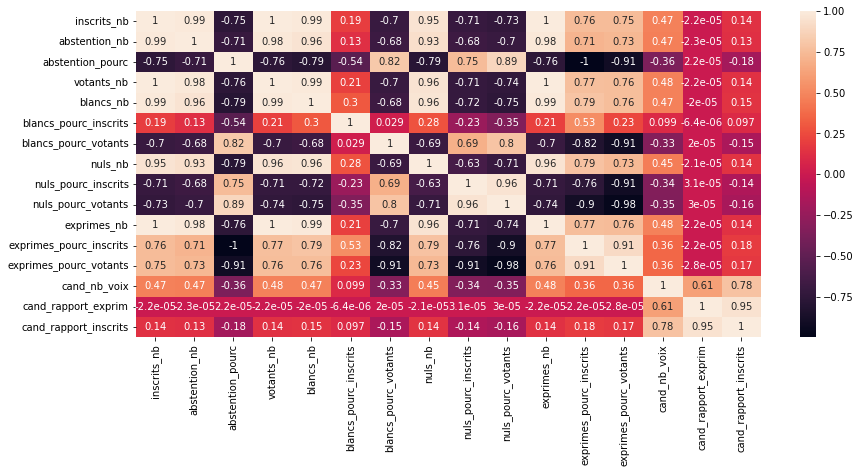

In [204]:
plt.figure(figsize = (14,6))
sns.heatmap(data.corr(), annot = True)

In [205]:
data.corr()

,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,blancs_pourc_inscrits,blancs_pourc_votants,nuls_nb,nuls_pourc_inscrits,nuls_pourc_votants,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
inscrits_nb,1.000000,0.988946,-0.752072,0.999078,0.987705,0.192464,-0.695319,0.954530,-0.706659,-0.730908,0.999127,0.756787,0.753260,0.474854,-0.000022,0.138531
abstention_nb,0.988946,1.000000,-0.709149,0.981669,0.960233,0.130561,-0.684383,0.931738,-0.676670,-0.697876,0.981902,0.714309,0.726593,0.466668,-0.000023,0.130757
abstention_pourc,-0.752072,-0.709149,1.000000,-0.761399,-0.789125,-0.538459,0.815177,-0.785969,0.754432,0.890569,-0.760582,-0.999847,-0.906610,-0.361481,0.000022,-0.183007
votants_nb,0.999078,0.981669,-0.761399,1.000000,0.991588,0.209593,-0.695619,0.957194,-0.712428,-0.737459,0.999996,0.765966,0.757875,0.475267,-0.000022,0.140210
blancs_nb,0.987705,0.960233,-0.789125,0.991588,1.000000,0.302311,-0.676107,0.961500,-0.715642,-0.750854,0.991271,0.792541,0.760062,0.471120,-0.000020,0.145073
blancs_pourc_inscrits,0.192464,0.130561,-0.538459,0.209593,0.302311,1.000000,0.028839,0.278790,-0.226765,-0.348812,0.207779,0.527506,0.229470,0.098751,-0.000006,0.096561
blancs_pourc_votants,-0.695319,-0.684383,0.815177,-0.695619,-0.676107,0.028839,1.000000,-0.690362,0.693280,0.796721,-0.695681,-0.821473,-0.908781,-0.330636,0.000020,-0.150348
nuls_nb,0.954530,0.931738,-0.785969,0.957194,0.961500,0.278790,-0.690362,1.000000,-0.631560,-0.706152,0.956547,0.788061,0.734408,0.454617,-0.000021,0.144248
nuls_pourc_inscrits,-0.706659,-0.676670,0.754432,-0.712428,-0.715642,-0.226765,0.693280,-0.631560,1.000000,0.958107,-0.712568,-0.764405,-0.910277,-0.338662,0.000031,-0.139926
nuls_pourc_votants,-0.730908,-0.697876,0.890569,-0.737459,-0.750854,-0.348812,0.796721,-0.706152,0.958107,1.000000,-0.737167,-0.897256,-0.976217,-0.350353,0.000030,-0.164238


On supprime les colonnes avec une grande valeur de corrélation

In [206]:
col_to_remove = ['inscrits_nb','abstention_nb','votants_nb','nuls_pourc_inscrits','blancs_nb','nuls_nb','exprimes_nb', 'cand_nb_voix','exprimes_pourc_votants', 'cand_rapport_inscrits']
data = data.drop(columns = col_to_remove)

In [207]:
data

,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_inscrits,cand_nom,cand_rapport_exprim
0,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ARTHAUD,0.80
1,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ROUSSEL,0.49
2,Guadeloupe,55.25,0.86,1.92,2.56,42.75,MACRON,13.43
3,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LASSALLE,0.76
4,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LE PEN,17.92
...,...,...,...,...,...,...,...,...
211,Corse,37.29,1.04,1.65,1.28,60.87,HIDALGO,1.07
212,Corse,37.29,1.04,1.65,1.28,60.87,JADOT,3.25
213,Corse,37.29,1.04,1.65,1.28,60.87,PÉCRESSE,6.33
214,Corse,37.29,1.04,1.65,1.28,60.87,POUTOU,0.93


In [208]:
Data = data.select_dtypes('float')
Data

,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_inscrits,cand_rapport_exprim
0,55.25,0.86,1.92,2.56,42.75,0.80
1,55.25,0.86,1.92,2.56,42.75,0.49
2,55.25,0.86,1.92,2.56,42.75,13.43
3,55.25,0.86,1.92,2.56,42.75,0.76
4,55.25,0.86,1.92,2.56,42.75,17.92
...,...,...,...,...,...,...
211,37.29,1.04,1.65,1.28,60.87,1.07
212,37.29,1.04,1.65,1.28,60.87,3.25
213,37.29,1.04,1.65,1.28,60.87,6.33
214,37.29,1.04,1.65,1.28,60.87,0.93


In [209]:
x = StandardScaler()
Data = x.fit_transform(Data)
print(Data)

[[ 1.45062946 -1.67814339  0.34400299  1.70018213 -1.45201288 -0.69024977]
 [ 1.45062946 -1.67814339  0.34400299  1.70018213 -1.45201288 -0.71865333]
 [ 1.45062946 -1.67814339  0.34400299  1.70018213 -1.45201288  0.46696623]
 ...
 [ 0.24662563 -0.5212956  -0.27750427  0.14696261 -0.2483007  -0.18356691]
 [ 0.24662563 -0.5212956  -0.27750427  0.14696261 -0.2483007  -0.6783386 ]
 [ 0.24662563 -0.5212956  -0.27750427  0.14696261 -0.2483007  -0.60229036]]


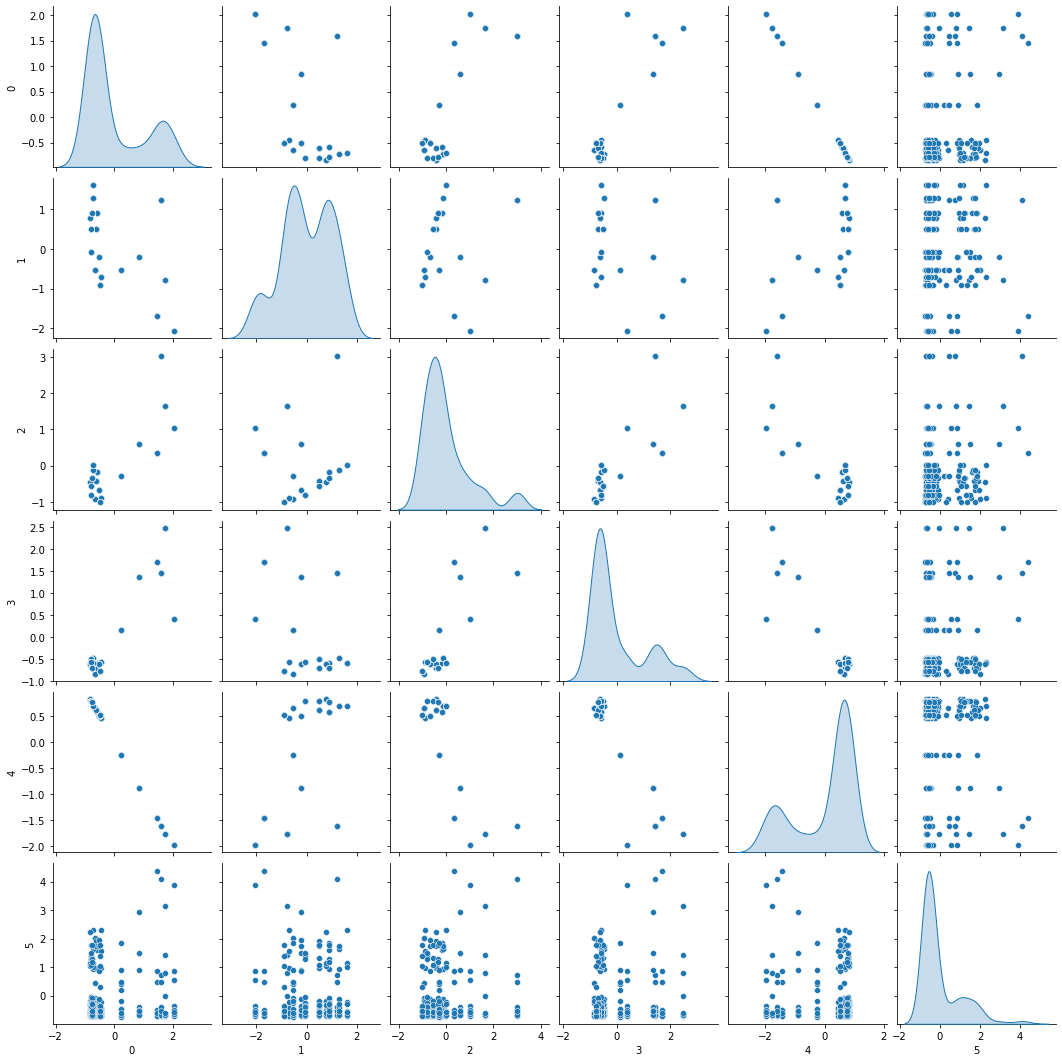

In [210]:
Data = pd.DataFrame(Data)
sns.pairplot(Data,kind="scatter", diag_kind="kde")

# Gaussian mixture algorithm

In [211]:
from sklearn.mixture import GaussianMixture

Détermination du nombre idéal de clusters dans le modèle de mélange gaussian

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


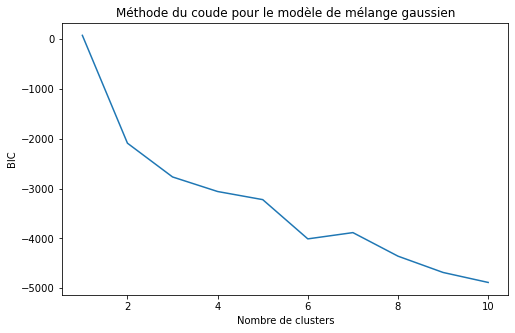

In [212]:
inertias = []

#Testons le modèle pour différents nombres de clusters
for k in range(1, 11):
    gmm = GaussianMixture(n_components = k, random_state = 42)
    gmm.fit(Data)
    inertias.append(gmm.bic(Data))

#Traçons la courbe d'inertie
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), inertias)
plt.title('Méthode du coude pour le modèle de mélange gaussien')
plt.xlabel('Nombre de clusters')
plt.ylabel('BIC')
plt.show()

On prend 6 clusters

In [164]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(Data)

clusters = gmm.predict(Data)
cluster_p = gmm.predict_proba(Data) #donne la probabilité que chaque point est dans le cluster
cluster_p

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       ...,
       [1.72721922e-046, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 8.54624316e-103, 0.00000000e+000],
       [2.03734594e-048, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 8.53543657e-102, 0.00000000e+000],
       [4.11530817e-048, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 9.21485063e-102, 0.00000000e+000]])

In [165]:
gmm_scores = gmm.score_samples(Data)
print('Silhouette score:\n', silhouette_score(Data,clusters))
print('Scores:\n', gmm_scores)

Silhouette score:
 0.45031199863711013
Scores:
 [19.15232111 19.14117117 19.22430714 19.15090767 19.07009459 19.19963931
 13.93463432 19.18152306 19.17359546 19.21727986 19.14263514 19.1777543
 25.73616664 25.71561368 25.70635992 25.72806288 25.79747866 25.77940403
 21.00279812 25.79632268 25.75062927 25.81147335 25.72227424 25.7757248
 19.15337628 19.14841614 19.20401116 19.17391818 19.08159703 19.24869491
 15.10831071 19.17552475 19.20871431 19.21293093 19.16902829 19.19124373
 19.09037295 19.08412914 18.95789951 19.10799337 18.38961875 19.19667871
 15.94741464 19.11688976 19.14636932 19.16516066 19.07876001 19.14987185
 19.10018819 19.06925854 19.02349867 19.09033327 15.42567141 19.10705169
 18.46994578 19.08505662 19.08165774 19.26414984 19.08650352 19.11288159
  9.34802429  9.50890799  6.2807232   9.48159865  7.99338951  9.33425108
  6.27070483  9.46683256  9.53852648  9.47997935  9.37430229  9.48159865
  9.0349592   9.67173304  5.93813573  9.69482902  6.27597435  7.9171179
  5.43